In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pew = pd.read_csv('Data/Data/pew.csv')

# List of contents:
   1. Original dataset info
   2. The dataset after tidy
   3. Sum of people in each income range for each religion
   4. A specific income range numbers for each religion
   5. Commom revenue in each religion
   6. Percentage of people in each religion and each income group
   7. Percentage plot of income groups for Buddhists

# 1. Original dataset info

In [3]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [4]:
pew.shape

(18, 11)

In [5]:
pd.melt(pew,id_vars=['religion']).head()

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [6]:
pew_tidy=pd.melt(pew,id_vars="religion",var_name="income",value_name="count")

# 2. The dataset after tidy

In [7]:
pew_tidy.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [8]:
pew_tidy.shape

(180, 3)

In [9]:
duplicateRowsDF =pew_tidy[pew_tidy.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [religion, income, count]
Index: []


In [10]:
pew_tidy.isnull().sum()

religion    0
income      0
count       0
dtype: int64

In [11]:
pew_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   religion  180 non-null    object
 1   income    180 non-null    object
 2   count     180 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


####  The thing that can be infered from the description is that the dataset is not balanced because of the high standard deviation:

In [12]:
pew_tidy.describe()

,count
count,180.000000
mean,197.533333
std,326.548693
min,1.000000
25%,18.000000
50%,46.000000
75%,218.500000
max,1529.000000


#    3. Sum of people in each income range for each religion

In [22]:
pew_tidy.groupby(['religion','income'])['count'].sum()

religion      income            
Agnostic      $10-20k                34
              $100-150k             109
              $20-30k                60
              $30-40k                81
              $40-50k                76
                                   ... 
Unaffiliated  $50-75k               528
              $75-100k              407
              <$10k                 217
              >150k                 258
              Don't know/refused    597
Name: count, Length: 180, dtype: int64

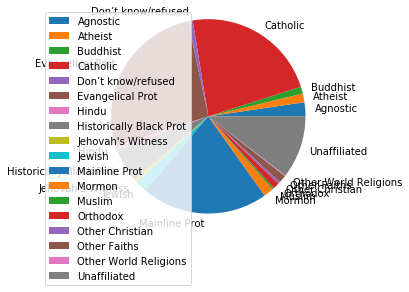

In [14]:
pew_tidy.groupby(['religion']).sum().plot(kind='pie', y='count')
plt.axis('equal')
plt.ylabel('')

plt.show()
#(kind='pie', fontsize=17, colors=colors, explode=explode)

# A specific income range numbers for each religion

In [15]:
pew_tidy_filtered = pew_tidy[pew_tidy['income'] =='$10-20k']
print(pew_tidy_filtered)

                   religion   income  count
18                 Agnostic  $10-20k     34
19                  Atheist  $10-20k     27
20                 Buddhist  $10-20k     21
21                 Catholic  $10-20k    617
22       Don’t know/refused  $10-20k     14
23         Evangelical Prot  $10-20k    869
24                    Hindu  $10-20k      9
25  Historically Black Prot  $10-20k    244
26        Jehovah's Witness  $10-20k     27
27                   Jewish  $10-20k     19
28            Mainline Prot  $10-20k    495
29                   Mormon  $10-20k     40
30                   Muslim  $10-20k      7
31                 Orthodox  $10-20k     17
32          Other Christian  $10-20k      7
33             Other Faiths  $10-20k     33
34    Other World Religions  $10-20k      2
35             Unaffiliated  $10-20k    299


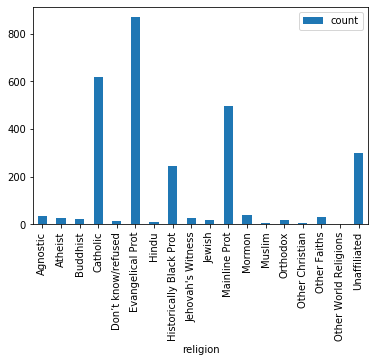

In [23]:
pew_tidy_filtered.set_index('religion').plot.bar()

In [17]:
pew_tidy_filtered.loc[23]

religion    Evangelical Prot
income               $10-20k
count                    869
Name: 23, dtype: object

#  5. Commom revenue in each religion

In [18]:
common_religion_income = pew_tidy.groupby('religion')['count'].transform(max)== pew_tidy['count']

In [19]:
pew_tidy[common_religion_income].head()

,religion,income,count
90,Agnostic,$50-75k,137
101,Mormon,$50-75k,112
102,Muslim,$50-75k,23
110,Buddhist,$75-100k,62
122,Other Christian,$75-100k,18


# 6. Percentage of people in each religion and each income group

In [20]:
pew_tidy['perc']= ((pew_tidy['count']/pew_tidy['count'].sum())*100).round(2)

In [29]:
pew_tidy['perc'].head()

0    0.08
1    0.03
2    0.08
3    1.18
4    0.04
Name: perc, dtype: float64

# 7. Percentage plot of income groups for Buddhists

C:\Users\Hoda\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


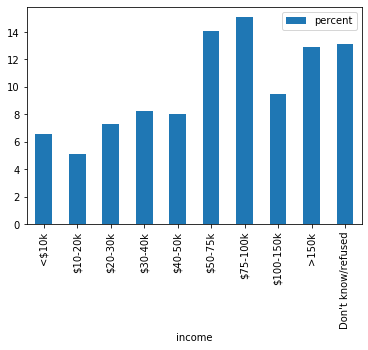

In [42]:
buddhist = pew_tidy[pew_tidy['religion'] == 'Buddhist']
buddhist['percent'] = ((buddhist['count']/buddhist['count'].sum())*100).round(2)
buddhist.plot.bar(x='income', y='percent')